# 주요 자연어 처리 모델 변화
```
Bag of words
    ↓
Words Embeddings
    ↓
RNN based models
    ↓
LSTM based models
    ↓
Bi-directional LSTM
    ↓
Attention based
    ↓
Transformers
```

# 트랜스포머(Transformer)
- 2017년 구글이 발표한 논문인 "Attention is all you need"에서 나온 모델
- 순환신경망을 제외하고 Attention mechanism 만을 사용하여 인코더와 디코더 구조로 구현된 모델
- 인코더와 디코더 내에서 attention mechanism 적용(self attention)
- 인코더와 디코더 사이에서 attention mechanism 적용


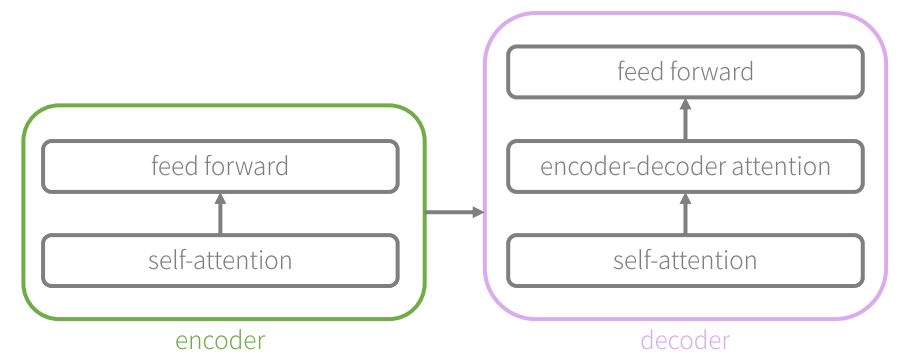

## Transformer의 Attention
- 트랜스포머에서는 총 3가지의 어텐션이 사용
- 셀프 어텐션은 Query, Key, Value가 동일한 문장에서 이루어지는 경우를 말함


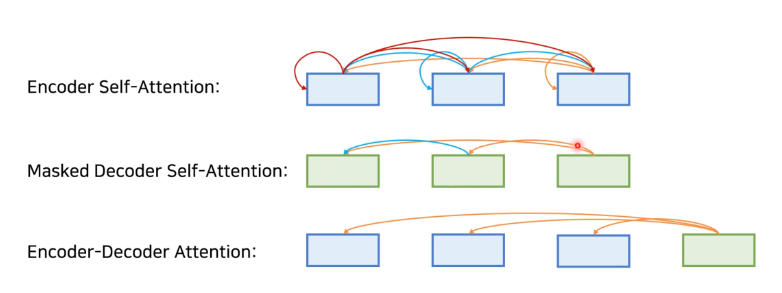

## Transformer 구조 개요



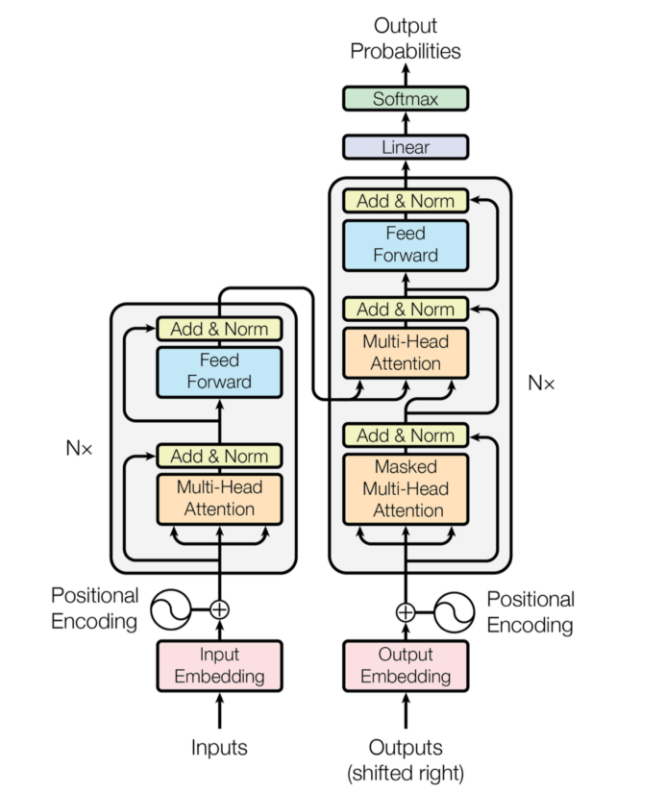

## 트랜스포머 주요 파라미터
- d_model (출력의 크기)
    - 트랜스포머의 인코더와 디코더에서의 입력과 출력의 크기를 의미
    - 임베딩 벡터의 차원수와 동일
    - 논문에서는 512

- nhead (병렬)
    - 트랜스포머에서는 어텐션을 수행할 때, 여러 개로 분할해서 병렬로 어텐션을 수행하고 결과값을 다시 하나로 합치는 방식을 택했는데 여기서 병렬의 개수를 의미
    - 논문에서는 8

- num_layers (layer로)
    - 트랜스포머에서 인코더와 디코더를 하나의 layer로 생각했을 때 몇개의 layer로 구성할 지에 대한 수
    - 논문에서는 인코더와 디코더 각각 6개의 layer

- dim_feedforward (피드 포워드 신경망)
    - 트랜스포머 내부에는 피드 포워드 신경망이 존재하는데 해당 신경망의 중간 은닉층의 크기를 의미
    - 논문에서는 2048
    - 인코더와 디코더의 피드 포워드의 최종 출력 노드 개수는 d_model 과 같음

## 위치 인코딩(Positional encoding)

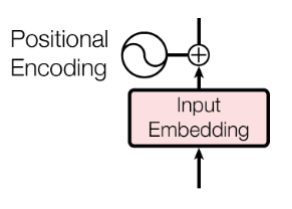

- 트랜스포머 모형은 순서를 다루는 구조가 없음
- 문장에서 단어의 위치를 인코딩하여 단어 임베딩에 더해줌
- 정현파를 이용하여 위치를 인코딩
    - 정현파: sin 함수 또는 cos 함수의 파형

$$
PE_{(pos,\ 2i)}=sin(pos/10000^{2i/d_{model}})
$$

$$
PE_{(pos,\ 2i+1)}=cos(pos/10000^{2i/d_{model}})
$$

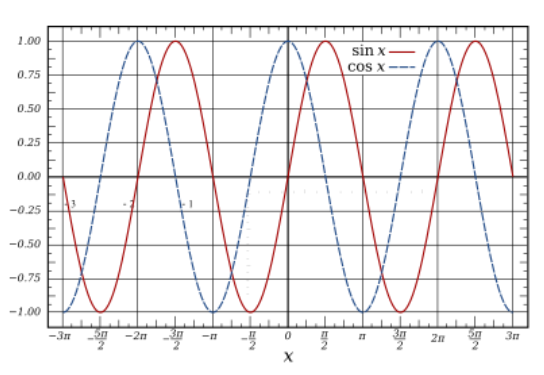

# 트랜스포머에서 정현파 위치 인코딩의 원리

트랜스포머 모델이 문장을 처리할 때 **정현파 위치 인코딩(Sinusoidal Position Encoding)**을 사용하는 이유와 적용 방식을 예제로 설명합니다.

---

## 문제 상황

모델이 다음 문장을 처리한다고 가정합니다:
> "I love NLP."

### 문제
단어의 의미만 알고 위치 정보를 모르면 모델은 다음과 같은 순서를 구분하지 못합니다:
- 올바른 순서: `"I love NLP"`
- 잘못된 순서: `"NLP love I"`

이를 해결하기 위해 각 단어에 위치 정보를 추가하는 **위치 인코딩(Position Encoding)**이 필요합니다.

---

## 정현파 위치 인코딩 원리

위치 $pos$와 임베딩 차원 $d_{model}$에 따라 위치 인코딩은 다음 식으로 정의됩니다:

$$
PE(pos, 2i) = \sin\left(\frac{pos}{10000^{2i / d_{model}}}\right), \quad
PE(pos, 2i+1) = \cos\left(\frac{pos}{10000^{2i / d_{model}}}\right)
$$

- $2i$: 짝수 차원에 $\sin$ 값을 사용
- $2i+1$: 홀수 차원에 $\cos$ 값을 사용

### 예시: 위치 인코딩 계산

단어 임베딩 차원을 $d_{model} = 4$로 설정하고, 문장 "I love NLP"의 위치 인코딩을 계산합니다:

#### 위치 $pos = 1$ ("I")
$$
PE(1) = [\sin(1), \cos(1), \sin(1/10000), \cos(1/10000)]
$$
≈ [0.841, 0.540, 0.0001, 1.000]

#### 위치 $pos = 2$ ("love")
$$
PE(2) = [\sin(2), \cos(2), \sin(2/10000), \cos(2/10000)]
$$
≈ [0.909, -0.416, 0.0002, 1.000]

#### 위치 $pos = 3$ ("NLP")
$$
PE(3) = [\sin(3), \cos(3), \sin(3/10000), \cos(3/10000)]
$$
≈ [0.141, -0.990, 0.0003, 1.000]

---

## 위치 인코딩 추가: 문장 벡터 생성

단어 임베딩과 위치 인코딩을 더하여 최종 문장 벡터를 생성합니다.

#### 1. 단어 임베딩 벡터
- "I": [0.1, 0.2, 0.3, 0.4]
- "love": [0.5, 0.6, 0.7, 0.8]
- "NLP": [0.9, 1.0, 1.1, 1.2]

#### 2. 위치 인코딩 벡터
- "I" ($pos=1$): [0.841, 0.540, 0.0001, 1.000]
- "love" ($pos=2$): [0.909, -0.416, 0.0002, 1.000]
- "NLP" ($pos=3$): [0.141, -0.990, 0.0003, 1.000]

#### 3. 최종 문장 벡터
단어 임베딩 + 위치 인코딩:
- "I": [0.1+0.841, 0.2+0.540, 0.3+0.0001, 0.4+1.000]  
  ≈ [0.941, 0.740, 0.3001, 1.400]
- "love": [0.5+0.909, 0.6-0.416, 0.7+0.0002, 0.8+1.000]  
  ≈ [1.409, 0.184, 0.7002, 1.800]
- "NLP": [0.9+0.141, 1.0-0.990, 1.1+0.0003, 1.2+1.000]  
  ≈ [1.041, 0.010, 1.1003, 2.200]

---

## 결과: 위치 정보가 포함된 문장 벡터
최종 문장 벡터:
- "I": [0.941, 0.740, 0.3001, 1.400]
- "love": [1.409, 0.184, 0.7002, 1.800]
- "NLP": [1.041, 0.010, 1.1003, 2.200]

---

## 정현파 사용의 장점
1. **상대적 위치 정보 학습**: 인접한 위치 간의 관계를 쉽게 학습할 수 있음.
2. **일반화**: 모델이 훈련 데이터에 없는 긴 문장에서도 동작 가능.
3. **주기성**: 위치 정보의 반복적 패턴 학습이 가능.



## Self Attention
- Q, K, V가 모두 같은 시퀀스로 자기 시퀀스를 참조하여 Attention 하는 기법
- 하나의 입력값을 Query, Key, Value 세 가지 값으로 변환하여 셀프 어텐션을 수행
- 다음의 순서로 연산
    1. 각 단어 임베딩 x에 Q, K, V 각각의 가중치를 곱한다.
    2. Query와 Key 사이의 유사도를 구하고 softmax로 스코어화 한다.
    3. 구해진 스코어를 Value와 가중합하여 Attention이 적용된 context vector를 만든다
- 자기 자신에게 어텐션을 수행한다는 의미
- 셀프 어텐션은 입력 문장 내의 단어들끼리 유사도를 구함
- Self Attention의 Query, Key, Value
    - Q : 입력 문장의 모든 단어 벡터들
    - K : 입력 문장의 모든 단어 벡터들
    - V : 입력 문장의 모든 단어 벡터들

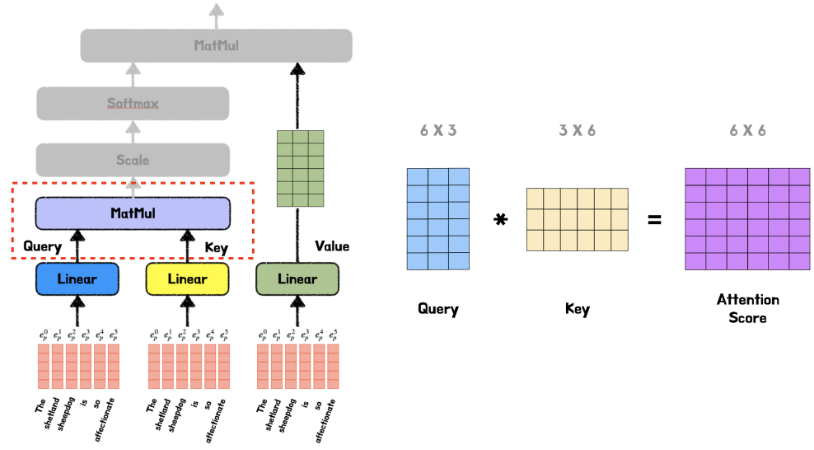

## Scaled Dot-Product Attention
- Dot-Product Attention에서 스케일링을 추가
- 스코어가 너무 커지지 않도록 쿼리와 키의 차원수에 루트를 씌운 수로 나눠줌

$$
score(Q, K)=QK^{T}/ \sqrt{d_k}
$$

$$d_k 는 쿼리(Query)와 키(Key) 벡터의 차원수(또는 길이)$$

## Multi-Headed Attention

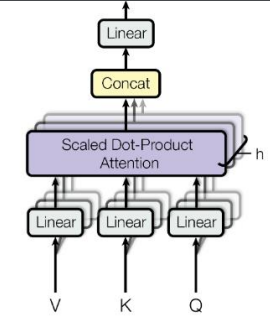

- Q, K, V를 여러 가지로 변환하여 주의 메커니즘 적용
- 원래 임베딩보다 작은 크기로 분할하여 어텐션을 수행한 다음 후에 결합하는 방식
- nhead 개수 만큼 Q, K, V 가중치 행렬을 만들어 행렬곱하여 나온 Q, K, V 를 이용하여 어텐션을 수행
- 예시로 하나의 단어에 대해 Q, K, V를 얻는 다고 했을 때 d_model 이 4이고, nhead 가 2 라면 4x2 가중치 행렬을 곱하여 2차원 벡터의 Q, K, V를 생성
- head
    - 한개의 head는 한 가지 Q, K, V의 결과
    
- 문장에서 여러 가지 방식으로 여러 위치에 어텐션을 수행


즉, 서로 다른 병렬 파트에서 각각의 어태션을 수행하고 이 제각각의 어탠션정보를 합친다.

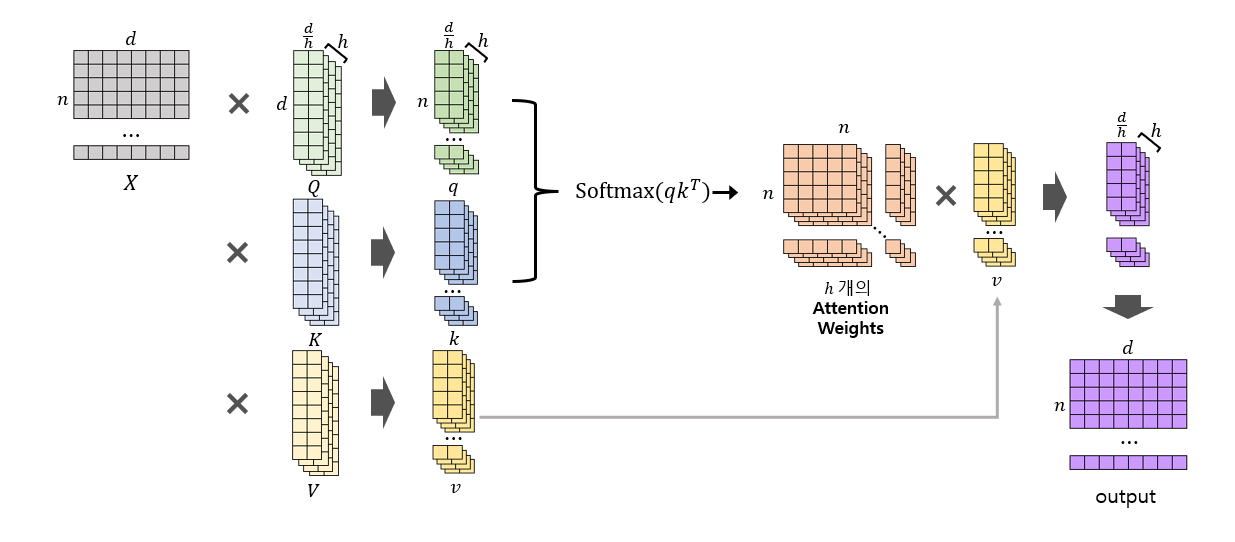

## Feed Forward
- FC-layer - Relu - Fc-layer 연산


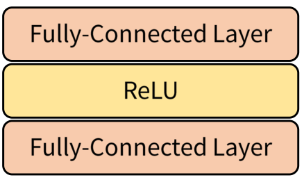

## Decoder Blocks
- 세부적인 구성 요소는 인코더와 크게 다르지 않으나 디코더의 역할에 맞는 구조가 추가
- 디코더에 Masked Multi-Head Attention 적용
    - 추론 과정에서 미래 참조의 문제를 방지하기 위한 구조
- 인코더로부터 전달된 정보를 반영하기 위한 인코더에서 출력된 Context Vector와 디코더 사이에서 Attention을 수행
    - Query: 디코더 벡터 (Masked Multi-Head Attention 파트의 출력)
    - Key: Context Vector (인코더 출력)
    - Value: Context Vector (인코더 출력)




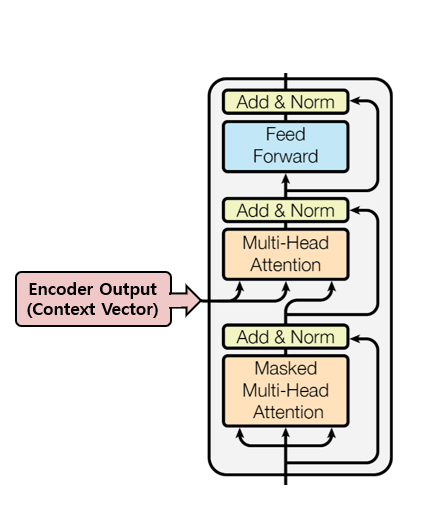

## Masked Multi-Head Attention
- 디코더 어텐션 연산에서 미래 참조 문제를 해결
- Query가 매칭되는 Key를 반영할 때 과거의 값만 참조하게 만드는 방법


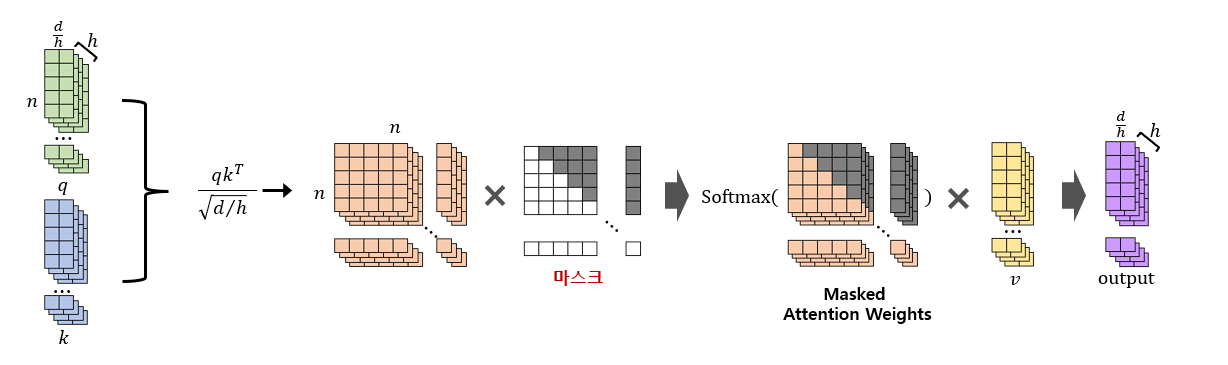

In [1]:
!pip install kiwipiepy

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
import pandas as pd
import numpy as np
import torch
from tqdm.auto import tqdm
import random
import os

def reset_seeds(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

DATA_PATH = os.getcwd()+"/data/en2ko/"
SEED = 42

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [4]:
train = pd.read_csv(f"{DATA_PATH}translate_en_ko.csv")
train.shape

(5794, 2)

In [5]:
train[['ko','en']].head()

,ko,en
0,이 제품들은 같은 품질이다.,These products are of the same quality.
1,미팅이 취소되었다.,The meeting was cancelled.
2,그들이 이것을 찾았다.,They found this.
3,톰은 메리에게 왜 그가 늦게까지 일해야 했는지 알려주지 않았다.,Tom didn't tell Mary why he had to work late.
4,먼저 가세요.,After you.


In [6]:
train["ko"] = train["ko"].str.replace("[^가-힣0-9 .,!?\"\']", "" , regex=True)
train["en"] = train["en"].str.replace("[^a-zA-Z0-9 .,!?\"\']", "" , regex=True).str.lower()

In [7]:
train[['ko','en']].head()

,ko,en
0,이 제품들은 같은 품질이다.,these products are of the same quality.
1,미팅이 취소되었다.,the meeting was cancelled.
2,그들이 이것을 찾았다.,they found this.
3,톰은 메리에게 왜 그가 늦게까지 일해야 했는지 알려주지 않았다.,tom didn't tell mary why he had to work late.
4,먼저 가세요.,after you.


# 한국어 전처리

## 토큰화

In [8]:
from kiwipiepy import Kiwi
kiwi = Kiwi()

In [9]:
gen = kiwi.tokenize(train["ko"])
src_data = []
for tokens in gen:
    tokens = [ t.form for t in tokens ]
    src_data.append(tokens)

In [10]:
src_data

[['이', '제품', '들', '은', '같', '은', '품질', '이', '다', '.'],
 ['미팅', '이', '취소', '되', '었', '다', '.'],
 ['그', '들', '이', '이것', '을', '찾', '었', '다', '.'],
 ['톰',
  '은',
  '메리',
  '에게',
  '왜',
  '그',
  '가',
  '늦',
  '게',
  '까지',
  '일',
  '하',
  '어야',
  '하',
  '었',
  '는지',
  '알리',
  '어',
  '주',
  '지',
  '않',
  '었',
  '다',
  '.'],
 ['먼저', '가', '세요', '.'],
 ['계속', '웃', '어', '.'],
 ['비', '가', '내리', '면', '집', '에', '있', '을', '것', '이', '다', '.'],
 ['나', '피', '나', '어'],
 ['톰', '이', '승낙', '하', '었', '어', '.'],
 ['방금', '나', 'ᆯ', '모욕', '하', '었', '어', '?'],
 ['나', 'ᆫ', '집중', '하', '려고', '애', '를', '쓰', '고', '있', '어', '.'],
 ['너', 'ᆫ', '왜', '그렇', '게', '바보', '같이', '굴', '어', '?'],
 ['끼', '어', '들', '어서', '죄송하', 'ᆸ니다', '.'],
 ['톰', '은', '기말', '시험', '공부', '를', '안', '하', '었', '어', '.'],
 ['그런', '일', '이', '생기', 'ᆫ다면', '어쩌', 'ᆯ', '거', '이', '야', '?'],
 ['톰', '은', '맥주', '를', '원', '하', 'ᆫ다', '.'],
 ['그거', 'ᆫ', '톰', '이', '이야기', '하', 'ᆫ', '것', '이', '아니', '다', '.'],
 ['메리',
  '는',
  '톰',
  '의',
  '자켓',
  '에서',
  '길',
  'ᆫ',
  

## 어휘집

In [11]:
from torchtext.vocab import build_vocab_from_iterator
vocab = build_vocab_from_iterator(src_data, specials=["<pad>", "<unk>"])
vocab.set_default_index( vocab["<unk>"] )

c:\Users\hopio\anaconda3\Lib\site-packages\torchtext\vocab\__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)
c:\Users\hopio\anaconda3\Lib\site-packages\torchtext\utils.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)


In [12]:
len(vocab)

3245

## 단어 번호 부여

In [13]:
src_data = [ vocab(lst) for lst in src_data ]

In [14]:
src_data

[[4, 2926, 32, 8, 50, 8, 3151, 4, 9, 2],
 [1112, 4, 1254, 38, 6, 9, 2],
 [22, 32, 4, 87, 12, 209, 6, 9, 2],
 [10,
  8,
  49,
  46,
  84,
  22,
  13,
  212,
  41,
  229,
  58,
  5,
  48,
  5,
  6,
  102,
  371,
  3,
  34,
  21,
  28,
  6,
  9,
  2],
 [893, 13, 62, 2],
 [166, 163, 3, 2],
 [246, 13, 414, 134, 85, 18, 16, 12, 25, 4, 9, 2],
 [11, 380, 11, 3],
 [10, 4, 2561, 5, 6, 3, 2],
 [1498, 11, 17, 2279, 5, 6, 3, 15],
 [11, 14, 434, 5, 176, 237, 19, 97, 20, 16, 3, 2],
 [26, 14, 84, 115, 41, 679, 165, 440, 3, 15],
 [587, 3, 32, 82, 1231, 92, 2],
 [10, 8, 2023, 459, 125, 19, 56, 5, 6, 3, 2],
 [305, 58, 4, 609, 410, 786, 17, 27, 4, 23, 15],
 [10, 8, 451, 19, 464, 5, 31, 2],
 [75, 14, 10, 4, 334, 5, 14, 25, 4, 83, 9, 2],
 [49,
  7,
  10,
  24,
  1214,
  43,
  306,
  14,
  1362,
  1098,
  91,
  2708,
  12,
  1492,
  5,
  6,
  9,
  2],
 [10, 46, 29, 5, 3, 2],
 [509, 137, 3, 34, 3, 2],
 [4, 1758, 123, 141, 38, 54, 15],
 [11, 14, 210, 118, 13, 48, 5, 3, 2],
 [10, 8, 1784, 47, 4, 23, 2],
 [11, 1

# 영어 전처리

## 토큰화

In [15]:
from torchtext.data.utils import get_tokenizer
tokenizer = get_tokenizer("basic_english")
tokenizer("i love you")

c:\Users\hopio\anaconda3\Lib\site-packages\torchtext\data\__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)


['i', 'love', 'you']

In [16]:
[1,2,3]+[4,5,6]

[1, 2, 3, 4, 5, 6]

In [17]:
sos_token = "<sos>"
eos_token = "<eos>"

trg_data = []
for text in train["en"]:
    lst = [sos_token] + tokenizer(text) + [eos_token]
    print(lst)
    trg_data.append(lst)

['<sos>', 'these', 'products', 'are', 'of', 'the', 'same', 'quality', '.', '<eos>']
['<sos>', 'the', 'meeting', 'was', 'cancelled', '.', '<eos>']
['<sos>', 'they', 'found', 'this', '.', '<eos>']
['<sos>', 'tom', 'didn', "'", 't', 'tell', 'mary', 'why', 'he', 'had', 'to', 'work', 'late', '.', '<eos>']
['<sos>', 'after', 'you', '.', '<eos>']
['<sos>', 'keep', 'smiling', '.', '<eos>']
['<sos>', 'if', 'it', 'rains', ',', 'i', "'", 'll', 'stay', 'at', 'home', '.', '<eos>']
['<sos>', 'i', "'", 'm', 'bleeding', '.', '<eos>']
['<sos>', 'tom', 'approved', '.', '<eos>']
['<sos>', 'did', 'you', 'just', 'insult', 'me', '?', '<eos>']
['<sos>', 'i', "'", 'm', 'having', 'a', 'hard', 'time', 'concentrating', '.', '<eos>']
['<sos>', 'why', 'are', 'you', 'acting', 'so', 'stupid', '?', '<eos>']
['<sos>', 'i', "'", 'm', 'sorry', 'for', 'interrupting', '.', '<eos>']
['<sos>', 'tom', 'didn', "'", 't', 'study', 'for', 'his', 'final', 'exam', '.', '<eos>']
['<sos>', 'what', 'would', 'you', 'do', 'if', 'that',

In [18]:
trg_data[0]

['<sos>',
 'these',
 'products',
 'are',
 'of',
 'the',
 'same',
 'quality',
 '.',
 '<eos>']

# 어휘집

In [19]:
vocab_trg = build_vocab_from_iterator(trg_data, specials=["<pad>", "<unk>", sos_token, eos_token])
vocab_trg.set_default_index( vocab["<unk>"] )

In [20]:
len(vocab_trg)

3129

# 단어번호 부여

In [21]:
trg_data = [ vocab_trg(lst) for lst in trg_data]

In [22]:
trg_data

[[2, 210, 2696, 29, 27, 11, 291, 1584, 4, 3],
 [2, 11, 574, 23, 1314, 4, 3],
 [2, 68, 477, 21, 4, 3],
 [2, 7, 56, 6, 14, 93, 43, 62, 22, 84, 9, 111, 165, 4, 3],
 [2, 242, 8, 4, 3],
 [2, 117, 586, 4, 3],
 [2, 79, 17, 1589, 20, 5, 6, 61, 188, 51, 97, 4, 3],
 [2, 5, 6, 25, 1909, 4, 3],
 [2, 7, 1818, 4, 3],
 [2, 57, 8, 120, 2384, 30, 10, 3],
 [2, 5, 6, 25, 258, 13, 124, 74, 713, 4, 3],
 [2, 62, 29, 8, 461, 101, 455, 10, 3],
 [2, 5, 6, 25, 112, 37, 1480, 4, 3],
 [2, 7, 56, 6, 14, 209, 37, 44, 876, 728, 4, 3],
 [2, 34, 85, 8, 18, 79, 15, 301, 9, 8, 10, 3],
 [2, 7, 184, 13, 464, 4, 3],
 [2, 15, 6, 16, 42, 34, 7, 12, 425, 80, 4, 3],
 [2, 43, 477, 13, 172, 1298, 480, 58, 7, 6, 16, 1119, 4, 3],
 [2, 93, 7, 4, 3],
 [2, 71, 217, 4, 3],
 [2, 32, 5, 24, 21, 849, 10, 3],
 [2, 5, 24, 9, 54, 185, 4, 3],
 [2, 7, 12, 1766, 4, 3],
 [2, 5, 6, 25, 64, 9, 54, 41, 55, 7, 4, 3],
 [2, 7, 88, 22, 167, 9, 54, 424, 4, 3],
 [2, 50, 1022, 118, 11, 448, 4, 3],
 [2, 99, 527, 4, 3],
 [2, 5, 150, 746, 122, 15, 4, 3],
 [

# 데이터셋 클래스

In [23]:
class TranslateDataset(torch.utils.data.Dataset):
    def __init__(self, src, trg):
        self.src = src
        self.trg = trg
    def __len__(self):
        return len(self.src)
    def __getitem__(self, idx):
        return self.src[idx], self.trg[idx]

In [24]:
import pprint as pp

In [25]:
def collate_fn(lst):
    src_lst = []
    trg_lst = []
    for src, trg in lst:
        src_lst.append( torch.tensor(src) )
        trg_lst.append( torch.tensor(trg) )

    src = torch.nn.utils.rnn.pad_sequence(src_lst, batch_first=True)
    trg = torch.nn.utils.rnn.pad_sequence(trg_lst, batch_first=True)

    return {"src": src, "trg": trg}

In [26]:
dt = TranslateDataset(src_data, trg_data)
dl = torch.utils.data.DataLoader(dt, batch_size = 2, shuffle=False, collate_fn=collate_fn)
batch = next(iter(dl))
batch

{'src': tensor([[   4, 2926,   32,    8,   50,    8, 3151,    4,    9,    2],
         [1112,    4, 1254,   38,    6,    9,    2,    0,    0,    0]]),
 'trg': tensor([[   2,  210, 2696,   29,   27,   11,  291, 1584,    4,    3],
         [   2,   11,  574,   23, 1314,    4,    3,    0,    0,    0]])}

# torch.nn.Transformer
- 클래스 주요 파라미터
    - d_model: 인코더와 인코더에서의 입력과 출력의 피처 크기를 의미(default: 512)
    - nhead: 멀티헤드 어텐션의 헤드수(default: 8)
    - num_encoder_layers: 인코더 레이어 수(default: 6)
    - num_decoder_layers: 디코더 레이어 수(default: 6)
    - dim_feedforward: 피드 포워드 신경망에 은닉층에 히든수(default: 2048)
    - dropout: 피드 포워드 신경망의 dropout(default: 0.1)
    - batch_first: 입력 텐서의 shape의 batch 차원순서에 대한 여부(default: False)
- forward의 주요 파라미터
    - src: 첫번째 파라미터로 인코더에 전달할 입력 텐서
    - tgt: 두번째 파라미터로 디코더에 전달할 입력 텐서
    - tgt_mask: 디코더에서 미래시점의 어텐션을 방지하기 위한 마스크



In [27]:
transformer = torch.nn.Transformer(batch_first=True)
transformer

Transformer(
  (encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-5): 6 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=512, out_features=512, bias=True)
        )
        (linear1): Linear(in_features=512, out_features=2048, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
        (linear2): Linear(in_features=2048, out_features=512, bias=True)
        (norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.1, inplace=False)
        (dropout2): Dropout(p=0.1, inplace=False)
      )
    )
    (norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
  )
  (decoder): TransformerDecoder(
    (layers): ModuleList(
      (0-5): 6 x TransformerDecoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=512, o

In [28]:
transformer.forward

<bound method Transformer.forward of Transformer(
  (encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-5): 6 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=512, out_features=512, bias=True)
        )
        (linear1): Linear(in_features=512, out_features=2048, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
        (linear2): Linear(in_features=2048, out_features=512, bias=True)
        (norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.1, inplace=False)
        (dropout2): Dropout(p=0.1, inplace=False)
      )
    )
    (norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
  )
  (decoder): TransformerDecoder(
    (layers): ModuleList(
      (0-5): 6 x TransformerDecoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicall

In [29]:
src_emb = torch.nn.Embedding(len(vocab), 512)
trg_emb = torch.nn.Embedding(len(vocab_trg), 512)

src = src_emb(batch["src"])
trg = trg_emb(batch["trg"])

src.shape, trg.shape

(torch.Size([2, 10, 512]), torch.Size([2, 10, 512]))

In [30]:
tgt_mask = torch.nn.Transformer.generate_square_subsequent_mask(batch["trg"].shape[1])
tgt_mask

tensor([[0., -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
        [0., 0., -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
        [0., 0., 0., -inf, -inf, -inf, -inf, -inf, -inf, -inf],
        [0., 0., 0., 0., -inf, -inf, -inf, -inf, -inf, -inf],
        [0., 0., 0., 0., 0., -inf, -inf, -inf, -inf, -inf],
        [0., 0., 0., 0., 0., 0., -inf, -inf, -inf, -inf],
        [0., 0., 0., 0., 0., 0., 0., -inf, -inf, -inf],
        [0., 0., 0., 0., 0., 0., 0., 0., -inf, -inf],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., -inf],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [32]:
tgt_mask.shape

torch.Size([10, 10])

In [31]:
outputs = transformer(src,trg, tgt_mask = tgt_mask)
outputs.shape # batch, seq, features

torch.Size([2, 10, 512])

$$
PE_{(pos,\ 2i)}=sin(pos/10000^{2i/d_{model}})
$$

$$
PE_{(pos,\ 2i+1)}=cos(pos/10000^{2i/d_{model}})
$$

In [33]:
class PositionalEncoding(torch.nn.Module):
    def __init__(self, max_len, d_model):
        super().__init__()
        pos_encoding = torch.zeros(max_len, d_model) # seq, features

        #print(pos_encoding.shape)

        pos = torch.arange(0, max_len, dtype=torch.float32).view(-1,1) # seq, 1
        _2i = torch.arange(0, d_model, step=2, dtype=torch.float32) # d_model 절반 크기의 벡터

        pos_encoding[:, 0::2] = torch.sin( pos / 10000 ** (_2i/d_model) )
        pos_encoding[:, 1::2] = torch.cos( pos / 10000 ** (_2i/d_model) )

        #print(pos.shape)

        pos_encoding = pos_encoding.unsqueeze(0) # seq, features -> batch(1), seq, features

        #print(pos_encoding.shape)

        # 첫번째 인수로 인스턴스 변수명, 두번째 인수로 저장하고자하는 데이터 전달
        # cpu 또는 gpu 메모리에서 모두 작동
        # 학습 가능한 파라미터가 있는 텐서를 등록할 경우 업데이트를 안한다.
        self.register_buffer("pos_encoding", pos_encoding) # 텐서가 버퍼에 등록 됨! 
        #! 파라미터는 모델의 학습 가능한 가중치입니다(requires_grad=True).
        #! 버퍼는 학습되지 않지만 모델의 상태에 포함되는 값입니다.

    def forward(self,x): # x는 임베딩 텐서, batch , seq, features
        return x + self.pos_encoding[ :, :x.shape[1] ]

In [34]:
pe = PositionalEncoding(1000,512)
pe(src).shape

torch.Size([2, 10, 512])

In [35]:
pe.forward

<bound method PositionalEncoding.forward of PositionalEncoding()>

# Seq2Seq 모델

In [36]:
class Net(torch.nn.Module):
    def __init__(self,
                 src_vocab_size,
                 trg_vocab_size,
                 max_len = 1000, # 시퀀스 최대길이
                 d_model = 512,
                 nhead = 8,
                 num_encoder_layers = 6,
                 num_decoder_layers = 6,
                 dim_feedforward = 2048):
        super().__init__()

        # 임베딩
        self.src_emb = torch.nn.Embedding(src_vocab_size, d_model)
        self.trg_emb = torch.nn.Embedding(trg_vocab_size, d_model)

        # 위치 인코딩
        self.pe = PositionalEncoding(max_len, d_model)

        # 트랜스 포머
        self.transformer = torch.nn.Transformer(d_model=d_model,
                                                nhead=nhead,
                                                num_encoder_layers=num_encoder_layers,
                                                num_decoder_layers=num_decoder_layers,
                                                dim_feedforward=dim_feedforward,
                                                batch_first=True)

        # 단어 예측
        self.fc_out = torch.nn.Linear(d_model, trg_vocab_size)

    def forward(self, src, trg, tgt_mask):

        src = self.pe( self.src_emb(src) ) # 임베딩 -> 위치정보반영 b, s ,f
        trg = self.pe( self.trg_emb(trg) ) # 임베딩 -> 위치정보반영 b, s, f

        x = self.transformer(src, trg, tgt_mask=tgt_mask) # b, s, f

        return self.fc_out(x) # batch, seq, n_class

    def encoder(self, src):
        src = self.pe( self.src_emb(src) ) # 임베딩 -> 위치정보반영 b, s ,f
        return self.transformer.encoder(src) # b, s ,f

    def decoder(self, trg, memory ):
        trg = self.pe( self.trg_emb(trg) ) # 임베딩 -> 위치정보반영 b, s, f
        x = self.transformer.decoder(trg, memory = memory) # b ,s ,f
        return self.fc_out(x) # batch, seq, n_class

In [37]:
model = Net(len(vocab), len(vocab_trg))
pred = model(batch["src"], batch["trg"], tgt_mask)
pred.shape

torch.Size([2, 10, 3129])

In [38]:
memory = model.encoder(batch["src"])
memory.shape

torch.Size([2, 10, 512])

In [39]:
pred = model.decoder(batch["trg"],memory)
pred.shape

torch.Size([2, 10, 3129])

# Train Loop의 `pred`와 `trg` 처리 과정 설명

## 1. **입력 데이터 구조**
- `pred`: 모델이 출력한 예측값.
  - 형태: `[batch_size, seq_len, n_class]`
  - 예시:
    ```python
    pred = torch.tensor([
        [[0.1, 0.6, 0.2, 0.1], [0.2, 0.5, 0.2, 0.1], [0.3, 0.4, 0.2, 0.1], [0.4, 0.3, 0.2, 0.1], [0.5, 0.2, 0.2, 0.1]],
        [[0.3, 0.4, 0.2, 0.1], [0.2, 0.5, 0.2, 0.1], [0.1, 0.6, 0.2, 0.1], [0.4, 0.3, 0.2, 0.1], [0.2, 0.7, 0.0, 0.1]]
    ])  # shape = [2, 5, 4]
    ```

- `trg`: 정답 데이터 (타겟 시퀀스).
  - 형태: `[batch_size, seq_len]`
  - 예시:
    ```python
    trg = torch.tensor([
        [2, 3, 1, 4, 0],  # 첫 번째 샘플
        [2, 1, 3, 0, 0]   # 두 번째 샘플
    ])  # shape = [2, 5]
    ```

---

## 2. **처리 단계**

### **(1) `pred`에서 EOS 토큰 예측값 제거**
- 코드:
  ```python
  pred_trimmed = pred[:, :-1]  # shape = [batch_size, seq_len - 1, n_class]
  pred_flattened = pred_trimmed.reshape(-1, n_class)  # shape = [(batch_size * (seq_len - 1)), n_class]

```py
pred_trimmed = torch.tensor([
    [[0.1, 0.6, 0.2, 0.1], [0.2, 0.5, 0.2, 0.1], [0.3, 0.4, 0.2, 0.1], [0.4, 0.3, 0.2, 0.1]],
    [[0.3, 0.4, 0.2, 0.1], [0.2, 0.5, 0.2, 0.1], [0.1, 0.6, 0.2, 0.1], [0.4, 0.3, 0.2, 0.1]]
])  # shape = [2, 4, 4]

pred_flattened = torch.tensor([
    [0.1, 0.6, 0.2, 0.1],
    [0.2, 0.5, 0.2, 0.1],
    [0.3, 0.4, 0.2, 0.1],
    [0.4, 0.3, 0.2, 0.1],
    [0.3, 0.4, 0.2, 0.1],
    [0.2, 0.5, 0.2, 0.1],
    [0.1, 0.6, 0.2, 0.1],
    [0.4, 0.3, 0.2, 0.1]
])  # shape = [8, 4]
```

## (2) trg에서 SOS 토큰 제거

```python
trg_trimmed = trg[:, 1:]  # shape = [batch_size, seq_len - 1]
trg_flattened = trg_trimmed.flatten()  # shape = [(batch_size * (seq_len - 1))]

결과:
trg_trimmed = torch.tensor([
    [3, 1, 4, 0],  # 첫 번째 샘플
    [1, 3, 0, 0]   # 두 번째 샘플
])  # shape = [2, 4]

trg_flattened = torch.tensor([3, 1, 4, 0, 1, 3, 0, 0])  # shape = [8]
```

# (3) 패딩 마스크 적용
mask: 정답에서 패딩(값 0)과 의미 없는 값(SOS, EOS)을 제외.


```python
mask = torch.tensor([True, False, True, False, False, True, False, False])

trg = torch.tensor([3, 4, 3])  # 정답 클래스
pred = torch.tensor([
    [0.1, 0.6, 0.2, 0.1],
    [0.3, 0.4, 0.2, 0.1],
    [0.1, 0.6, 0.2, 0.1]
])  # 각 클래스 확률
```

# 학습 loop 함수

In [40]:
def train_loop(dataloader, model, loss_fn, optimizer, device):
    epoch_loss = 0
    model.train()
    
    for batch in dataloader:
        src = batch["src"].to(device) # batch, seq
        trg = batch["trg"].to(device) # batch, seq
        tgt_mask = torch.nn.Transformer.generate_square_subsequent_mask(trg.shape[1]).to(device)

        pred = model(src, trg, tgt_mask) # batch, seq, n_class

        n_class = pred.shape[-1] # 정답 클래스 개수
        # 예측값에서는 eos 토큰 입력에 대한 예측값을 제외
        pred = pred[:,:-1].reshape(-1, n_class) # batch x seq, n_class

        # 정답에서 sos 토큰 제외
        trg = trg[:,1:].flatten() # batch x seq

        mask = trg > 2
        trg = trg[mask]
        pred = pred[mask]
        loss = loss_fn(pred, trg)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    epoch_loss /= len(dataloader)

    return epoch_loss

# 하이퍼파라미터 정의

In [41]:
hp = {
        "src_vocab_size": len(vocab),
        "trg_vocab_size": len(vocab_trg),
        "max_len" : 1000, # 시퀀스 최대길이
        "d_model" : 512,
        "nhead" : 8,
        "num_encoder_layers" : 1,
        "num_decoder_layers" : 1,
        "dim_feedforward" : 2048
      }

batch_size=64
loss_fn = torch.nn.CrossEntropyLoss()
epochs = 50

In [42]:
# del model
# torch.cuda.empty_cache()

In [43]:
reset_seeds(SEED)

epochs_list=[]
model = Net(**hp).to(device)
optimizer = torch.optim.Adam( model.parameters() )

train_dt = TranslateDataset(src_data, trg_data)
train_dl = torch.utils.data.DataLoader(train_dt, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
for i in tqdm(range(epochs)):
    loss = train_loop(train_dl, model, loss_fn, optimizer, device)
    epochs_list.append(loss)
    print(i,"에폭:", loss)

  0%|          | 0/50 [00:00<?, ?it/s]

c:\Users\hopio\anaconda3\Lib\site-packages\torch\nn\functional.py:5504: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:455.)
  attn_output = scaled_dot_product_attention(q, k, v, attn_mask, dropout_p, is_causal)


0 에폭: 4.2309399253719455
1 에폭: 3.1182124562315887
2 에폭: 2.559255165058178
3 에폭: 2.07921877012148
4 에폭: 1.7058378471122992
5 에폭: 1.3637029718566727
6 에폭: 1.0898086088044303
7 에폭: 0.8911658663016099
8 에폭: 0.7244278631367527
9 에폭: 0.5912961216418298
10 에폭: 0.5109660825231573
11 에폭: 0.460442772605917
12 에폭: 0.39870141037217866
13 에폭: 0.3541076130919404
14 에폭: 0.32989515708043027
15 에폭: 0.30912768038419575
16 에폭: 0.28339123987889553
17 에폭: 0.25909489000236596
18 에폭: 0.2516317740901486
19 에폭: 0.24678503451766548
20 에폭: 0.24007750146991605
21 에폭: 0.22985345043323852
22 에폭: 0.22306196850079757
23 에폭: 0.22504064244228406
24 에폭: 0.20712108746334745
25 에폭: 0.2006502023765019
26 에폭: 0.2063285857439041
27 에폭: 0.1901523205605182
28 에폭: 0.19395866965527062
29 에폭: 0.19097226817201782
30 에폭: 0.19597963718595085
31 에폭: 0.18230319424317434
32 에폭: 0.1725769131393223
33 에폭: 0.17122382269455835
34 에폭: 0.1718474996613932
35 에폭: 0.1769026117501678
36 에폭: 0.17443424807145044
37 에폭: 0.17634466405098254
38 에폭: 0

In [44]:
import plotly.graph_objs as go
import plotly.io as pio

# Create a trace for the loss values
trace = go.Scatter(
    x=list(range(1, len(epochs_list) + 1)),
    y=epochs_list,
    mode='lines+markers',
    marker=dict(size=8),
    name='Loss'
)

# Create the layout for the plot
layout = go.Layout(
    title='Training Loss Over Epochs',
    xaxis=dict(
        title='Epochs',
        gridcolor='gray'  # Set grid color for x-axis
    ),
    yaxis=dict(
        title='Loss',
        gridcolor='gray'  # Set grid color for y-axis
    ),
    showlegend=True,
    hovermode='x'
)

# Combine trace and layout into a figure
fig = go.Figure(data=[trace], layout=layout)

# Show the plot
pio.show(fig)


# 한국어 -> 영어 출력하는 함수

In [45]:
@torch.no_grad()
def translate(text, model, vocab_src, vocab_trg, max_len, device, tokenizer):
    model.eval()
    src = vocab_src([ t.form for t in tokenizer.tokenize(text)]) # 토큰화 -> 단어 번호 부여
    src = torch.tensor(src).view(1, -1).to(device) # 텐서로 변환후 배치차원 추가, batch(1), seq

    trg = [2] # 스타트 토큰
    trg = torch.tensor(trg).view(1, -1).to(device) # 텐서로 변환후 배치차원 추가, batch(1), seq

    memory = model.encoder(src) # batch, seq, features

    for _ in range(max_len):
        pred = model.decoder(trg, memory) # batch(1), seq, n_class

        token_no = pred[-1, -1].argmax().item()
        if token_no == 3:
            break

        print(  vocab_trg.lookup_token(token_no) , end=" " )


        next_token = torch.tensor([token_no]).view(1,-1).to(device) # 배치차원 추가, batch, seq
        trg = torch.cat([trg, next_token], dim=1)

In [46]:
text = train["ko"][100]
text

'나는 일요일에 일한다.'

In [47]:
translate(text, model, vocab, vocab_trg, 100, device, kiwi)

i work on sunday . 

In [48]:
translate('자연어는 어려운듯 쉬우면서 어렵다', model, vocab, vocab_trg, 100, device, kiwi)

it is easy easy to make new easy . 

In [50]:
text = '''선수입장 알아서 모셔 T.O.P class
I'm Mr. G in the club in my b-boy stance
진짜 놀 줄 아는 둘 제대로 터진 금술
Everybody make it move, make it move, 땡겨 쭉'''
translate(text, model, vocab, vocab_trg, 100, device, kiwi)

i don ' t know why they both you speak french . 

In [51]:
train["ko"][512]

'네가 고등학교 선생님이라는 게 사실이니?'

In [52]:
translate(train["ko"][512], model, vocab, vocab_trg, 100, device, kiwi)

is it true is your is a high is a high school ? 